# Hands Gesture Classifier


### Table of Contents:
* [1. Import of libraries](#1.-Import-of-libraries)
* [2. Prepare Workplace](#2.-Prepare-Workplace)
* [3. Data mining](#3.-Data-mining) 
    * [3.1 Implement Simple Camera Capture](#3.1-Implement-Simple-Camera-Capture) 
    * [3.2 Prepare dataset file](#3.2-Prepare-dataset-file)   
    * [3.3 Create hand gesture dataset](#3.3-Create-hand-gesture-dataset) 
* [4. Data Visualization](#4.-Data-Visualization)
* [5. Preprocessing](#5.-Preprocessing)
* [6. Prepare Classicication models](#6.-Prepare-Classicication-models)      
    * [6.1 Division of data into a training set and a test set](#6.1-Division-of-data-into-a-training-set-and-a-test-set)
    * [6.2 Classification models](#6.2-Classification-models)
        * [6.2.1 Logistic Regression](#6.2.1-Logistic-Regression) 
        * [6.2.2 Ridge Classifier](#6.2.2-Ridge-Classifier)
        * [6.2.3 Random Forest Classifier](#6.2.3-Random-Forest-Classifier)
        * [6.2.4 Gradient Boosting Classifier](#6.2.4-Gradient-Boosting-Classifier)
    * [6.3 Testing models](#6.3-Testing-models)
* [7. Compare the results](#7.-Compare-the-results)
* [8. Save model](#8.-Save-model)
    * [8.1 Prepare file with model](#8.1-Prepare-file-with-model)
    * [8.2. Live presentation (with camera)](#8.2.-Live-presentation-(with-camera))


# 1. Import of libraries
---

In [1]:
!pip install opencv-python==4.5.3.56 
!pip install mediapipe==0.8.8 

In [2]:
import os
import csv

import uuid
import time
import pickle
import sklearn
import cv2 
import pickle

import pandas as pd
import mediapipe as mp 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import hand_detector as hd
from camera_video_capture import CameraVideoCapture

from utils.hand_utils import prepare_hand_data, draw_hand_gesture
from models import ActionType, HandType

sklearn.__version__

'0.24.1'

# 2. Prepare Workplace
---

### Constants variables

In [3]:
COORDS_FILE_NAME = 'hand_gesture_coords.csv'
MODEL_FILE_NAME = 'hand-gestures-model.pkl'

DATA_DIRECTORY = os.path.join('data')

### Setup Folders

In [4]:
if not os.path.exists(DATA_DIRECTORY):
    if os.name == 'posix':
        !mkdir -p {DATA_DIRECTORY}
    if os.name == 'nt':
        !mkdir {DATA_DIRECTORY}
else: 
    print(f'The directory `{DATA_DIRECTORY}` already exists')

The directory `data` already exists


# 3. Data mining
---

## 3.1 Implement Simple Camera Capture

In [149]:
cam_width, cam_height = 1280, 720

cap = cv2.VideoCapture(0)
cap.set(3, cam_width)
cap.set(4, cam_height)

detector = hd.HandDetector(max_num_hands=2)
    
while cap.isOpened():
    success, img = cap.read()
    
    imgname = os.path.join(DATA_DIRECTORY, '{}.jpg'.format(str(uuid.uuid1())))
    cv2.imwrite(imgname, img)
    time.sleep(2)
    
    all_hands, img = detector.find_hands(img)
    if all_hands:
        hand = all_hands[0]
        hand_landmarks_list = all_hands[0].landmarks
        

    cv2.imshow("Hands Gesture Classifier", img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Read saved photo

In [9]:
hand_landmarks_list = []
hand = None

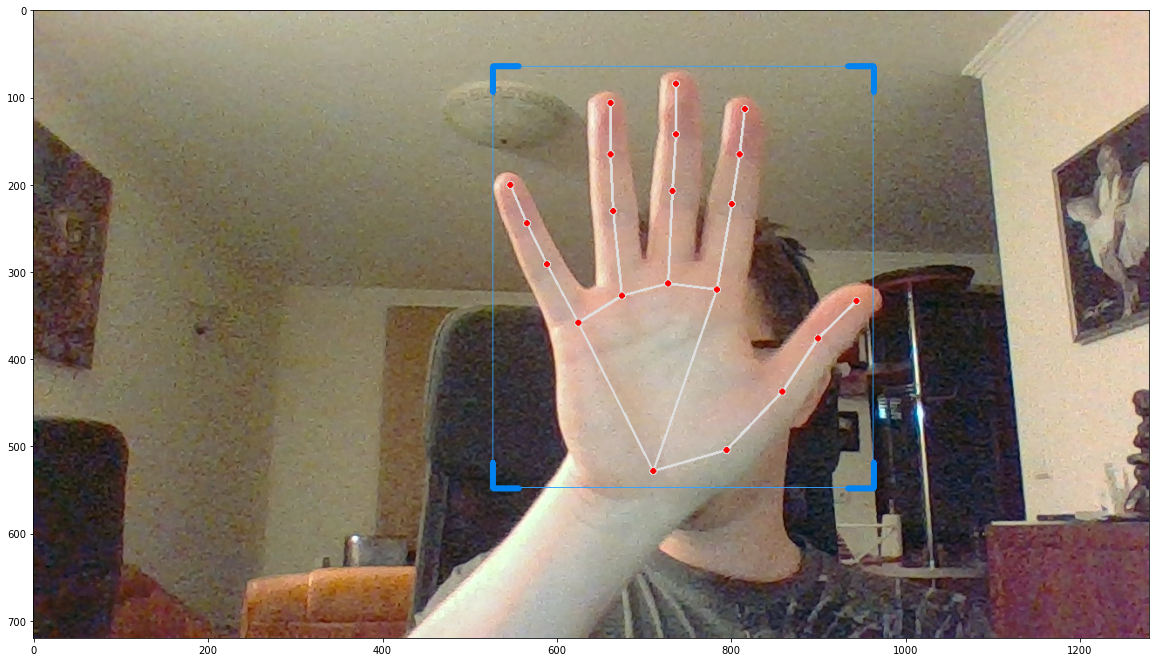

In [10]:
file_name = '92cc76f1-29ea-11ec-a40d-0897987f9062.jpg'

detector = hd.HandDetector(max_num_hands=2)

img = cv2.imread(os.path.join(DATA_DIRECTORY, file_name))

all_hands, img = detector.find_hands(img)
if all_hands:
    hand = all_hands[0]
    hand_landmarks_list = hand.landmarks

# Show image 
plt.figure(figsize=(20,12))

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
imgplot = plt.imshow(img)
plt.show()

In [11]:
number_coords = len(hand_landmarks_list)

number_coords

21

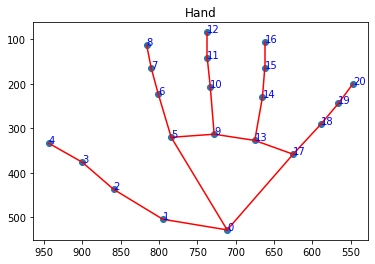

In [12]:
draw_hand_gesture(hand_landmarks_list, 'Hand')

Change of ranges to [0,1]


In [13]:
new_landmarks = prepare_hand_data(hand)
new_landmarks

[[0.42105263157894735, 0.9586776859504132, 0.0],
 [0.6132723112128147, 0.9090909090909092, -0.039770208299160004],
 [0.7597254004576659, 0.7706611570247934, -0.06088509038090706],
 [0.8535469107551488, 0.6446280991735538, -0.079563669860363],
 [0.954233409610984, 0.5557851239669421, -0.09956339746713638],
 [0.5881006864988558, 0.5289256198347108, -0.040834058076143265],
 [0.6270022883295194, 0.32644628099173556, -0.06816041469573975],
 [0.6475972540045767, 0.20867768595041322, -0.08831184357404709],
 [0.6613272311212814, 0.1012396694214876, -0.10328700393438339],
 [0.459954233409611, 0.5144628099173554, -0.044014159590005875],
 [0.47139588100686497, 0.29545454545454547, -0.06802450120449066],
 [0.4805491990846682, 0.16115702479338845, -0.08877452462911606],
 [0.4805491990846682, 0.04132231404958678, -0.10616964846849442],
 [0.33867276887871856, 0.5433884297520661, -0.05274256318807602],
 [0.3157894736842105, 0.34297520661157027, -0.08239372074604034],
 [0.30892448512585813, 0.208677685

Draw hand chart 

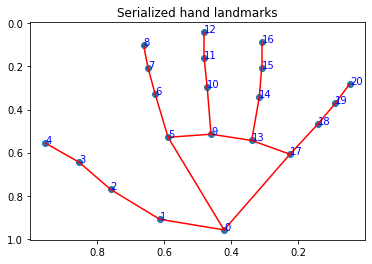

In [14]:
draw_hand_gesture(new_landmarks, 'Serialized hand landmarks')

## 3.2 Prepare dataset file

In [15]:
columns = ['target']
for val in range(1, number_coords + 1):
    columns += [f'x_{val}', f'y_{val}', f'z_{val}']
    
columns

['target',
 'x_1',
 'y_1',
 'z_1',
 'x_2',
 'y_2',
 'z_2',
 'x_3',
 'y_3',
 'z_3',
 'x_4',
 'y_4',
 'z_4',
 'x_5',
 'y_5',
 'z_5',
 'x_6',
 'y_6',
 'z_6',
 'x_7',
 'y_7',
 'z_7',
 'x_8',
 'y_8',
 'z_8',
 'x_9',
 'y_9',
 'z_9',
 'x_10',
 'y_10',
 'z_10',
 'x_11',
 'y_11',
 'z_11',
 'x_12',
 'y_12',
 'z_12',
 'x_13',
 'y_13',
 'z_13',
 'x_14',
 'y_14',
 'z_14',
 'x_15',
 'y_15',
 'z_15',
 'x_16',
 'y_16',
 'z_16',
 'x_17',
 'y_17',
 'z_17',
 'x_18',
 'y_18',
 'z_18',
 'x_19',
 'y_19',
 'z_19',
 'x_20',
 'y_20',
 'z_20',
 'x_21',
 'y_21',
 'z_21']

Create dataset file and save prepared columns names in it 

In [16]:
if not os.path.exists(os.path.join(COORDS_FILE_NAME)):
    with open(COORDS_FILE_NAME, mode='w', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow(columns)
else:
    print(f'File `{COORDS_FILE_NAME}` already exists')

File `hand_gesture_coords.csv` already exists


In [17]:
for a in ActionType:
    print(a.name)

NEUTRAL
CLICK
GRAB
GO_BACK
GO_FORWARD


## 3.3 Create hand gesture dataset 

In [18]:
def create_gesture_dataset(action_type: ActionType, hand_type: HandType, sample_num = 1000):
    """
    The function reads the location with all landmarks via a webcam. Pre-processes the data. 
    It also saves the finished data in a file.
    :param action_type: Action type for which the samples will be created.
    :param hand_type: Type of hand for which the samples will be created.
    :param sample_num: Number of samples created for action type.
    """
    cam_width, cam_height = 1280, 720
    cap = cv2.VideoCapture(0)
    cap.set(3, cam_width)
    cap.set(4, cam_height)

    detector = hd.HandDetector(max_num_hands=2, min_detection_confidence=0.8, min_tracking_confidence=0.8)

    while cap.isOpened():
        success, img = cap.read()
        all_hands, img = detector.find_hands(img)
       
        for hand in all_hands:
            if hand.type == hand_type:
                landmarks = prepare_hand_data(hand)
                
                row = list(np.array(landmarks).flatten())
                row.insert(0, action_type.value) 
                
                # Save to file
                with open(COORDS_FILE_NAME, mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)
                
                sample_num = sample_num - 1
        
        
        cv2.imshow("Hands Gesture Classifier", img)
        
        if sample_num <= 0:
            break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [19]:
# create_gesture_dataset(ActionType(3), HandType.RIGHT)

# 4. Data Visualization
---

In [25]:
action_type_mapper = {}

for a in ActionType:
    action_type_mapper[a.value] = a.name
    
action_type_mapper

{0: 'NEUTRAL', 1: 'CLICK', 2: 'GRAB', 3: 'GO_BACK', 4: 'GO_FORWARD'}

##### Load data from file

In [26]:
df = pd.read_csv(COORDS_FILE_NAME)
df.head()

,target,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,...,z_18,x_19,y_19,z_19,x_20,y_20,z_20,x_21,y_21,z_21
0,0,0.239583,0.935484,0.0,0.567708,0.877419,-0.012173,0.770833,0.732258,-0.013038,...,-0.009647,0.125000,0.374194,-0.017838,0.145833,0.280645,-0.023157,0.156250,0.193548,-0.026093
1,0,0.228426,0.936102,0.0,0.563452,0.872204,-0.015454,0.751269,0.722045,-0.017033,...,-0.002405,0.131980,0.373802,-0.009174,0.157360,0.284345,-0.016254,0.177665,0.198083,-0.020949
2,0,0.218274,0.936306,0.0,0.563452,0.869427,-0.014921,0.751269,0.722930,-0.015297,...,-0.000289,0.131980,0.369427,-0.006862,0.162437,0.280255,-0.013954,0.182741,0.194268,-0.018596
3,0,0.218274,0.936709,0.0,0.563452,0.870253,-0.013819,0.756345,0.718354,-0.013059,...,0.003770,0.131980,0.373418,-0.002648,0.157360,0.284810,-0.010005,0.172589,0.199367,-0.014722
4,0,0.214286,0.936508,0.0,0.556122,0.869841,-0.013956,0.750000,0.717460,-0.014119,...,-0.001229,0.127551,0.371429,-0.008608,0.147959,0.282540,-0.015942,0.168367,0.200000,-0.020622


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  4000 non-null   int64  
 1   x_1     4000 non-null   float64
 2   y_1     4000 non-null   float64
 3   z_1     4000 non-null   float64
 4   x_2     4000 non-null   float64
 5   y_2     4000 non-null   float64
 6   z_2     4000 non-null   float64
 7   x_3     4000 non-null   float64
 8   y_3     4000 non-null   float64
 9   z_3     4000 non-null   float64
 10  x_4     4000 non-null   float64
 11  y_4     4000 non-null   float64
 12  z_4     4000 non-null   float64
 13  x_5     4000 non-null   float64
 14  y_5     4000 non-null   float64
 15  z_5     4000 non-null   float64
 16  x_6     4000 non-null   float64
 17  y_6     4000 non-null   float64
 18  z_6     4000 non-null   float64
 19  x_7     4000 non-null   float64
 20  y_7     4000 non-null   float64
 21  z_7     4000 non-null   float64
 22  

Get Gesture types in file

In [28]:
gesture_types = np.sort(df.target.unique())
gesture_types

array([0, 1, 2, 3], dtype=int64)

In [29]:
df_count = pd.DataFrame(df.target.value_counts()).sort_index()
df_count.index = df_count.index.map(mapper=action_type_mapper)

print(df_count)

         target
NEUTRAL    1000
CLICK      1000
GRAB       1000
GO_BACK    1000


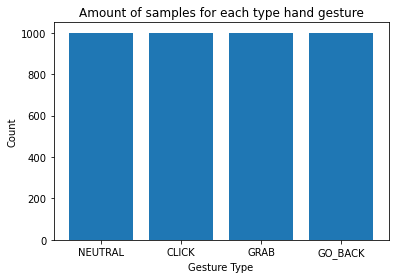

In [30]:
plt.bar(df_count.index, df_count.target)

plt.title('Amount of samples for each type hand gesture')
plt.xlabel("Gesture Type")
plt.ylabel("Count")

plt.show()

Data samples 

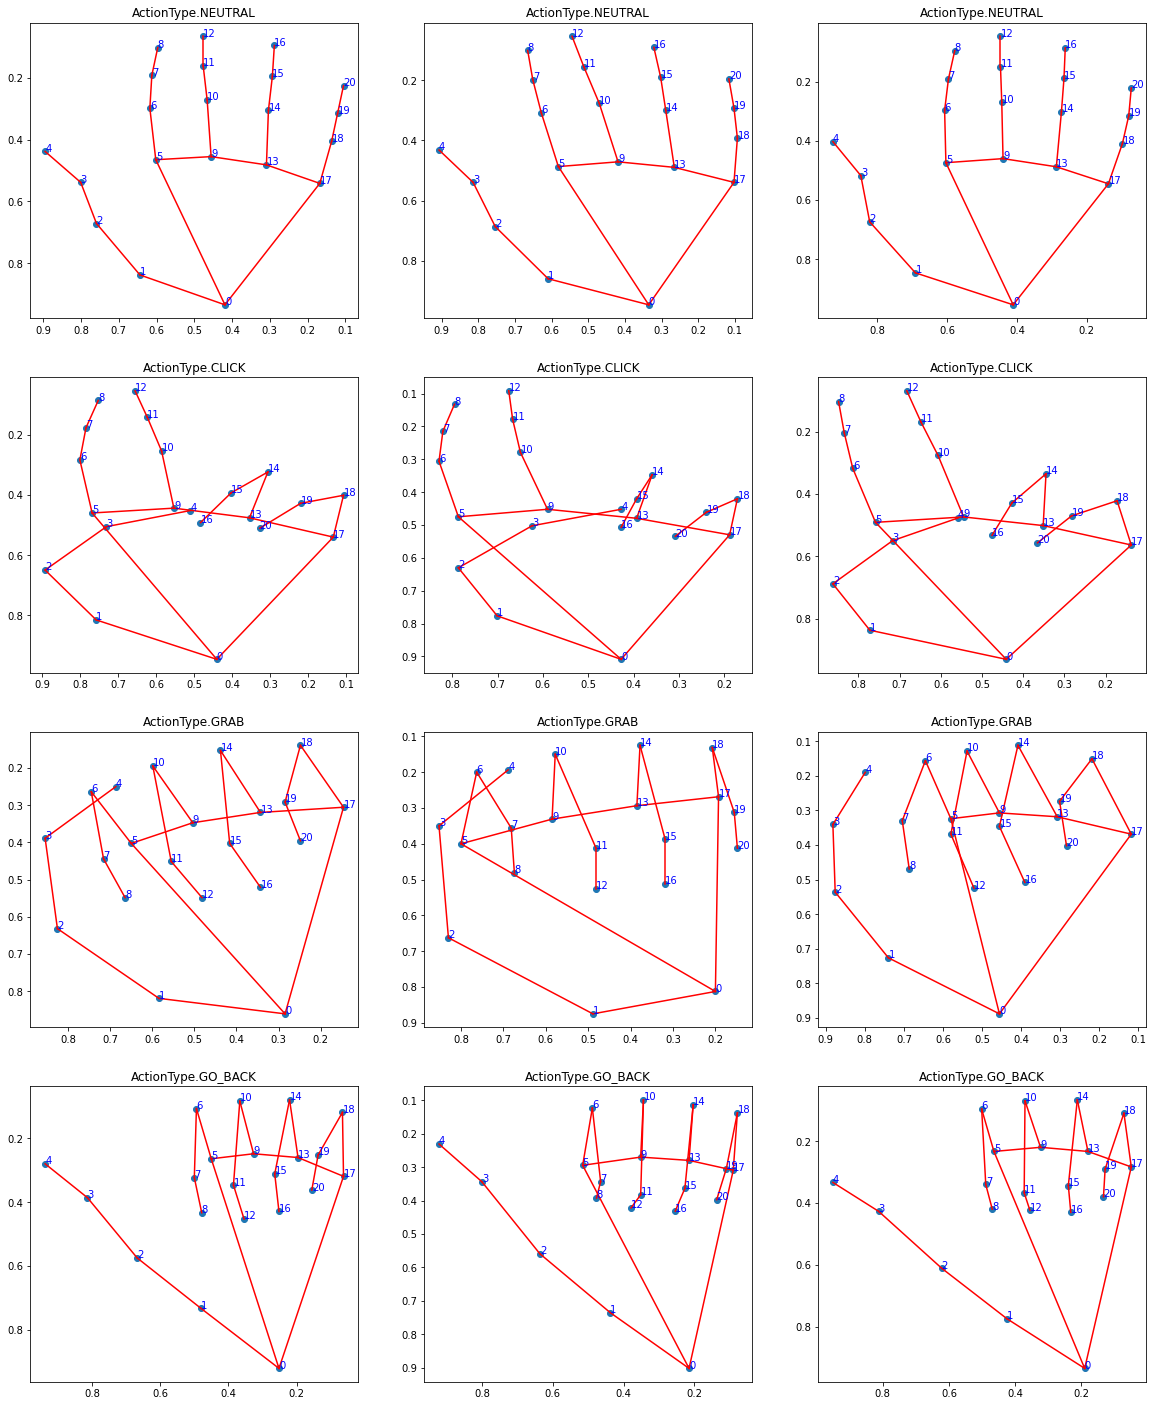

In [31]:
samples = df.loc[df.target == gesture_types[0]].sample(3).values.tolist()

for i in range(1, len(gesture_types)):
    samples = np.concatenate((samples, np.array(df.loc[df.target == gesture_types[i]].sample(3).values.tolist())))
    
plt.figure(figsize=(20, 25))
for i, sample in enumerate(samples):
    plt.subplot(4, 3, i+1)
    gesture_index = int(sample.item(0))
    sample_landmarks = np.delete(sample, 0)
    sample_landmarks = np.split(sample_landmarks, len(sample_landmarks) / 3)
    
    draw_hand_gesture(sample_landmarks, f'{ActionType(gesture_index)}')
    

# 5. Preprocessing
---

In [32]:
data = df.copy()

In [33]:
X = data.drop('target', axis=1) # features
y = data['target'] # target value

### Standarise data

In [34]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

# 6. Prepare Classicication models
---

## 6.1 Division of data into a training set and a test set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [36]:
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (2800, 63)
y_train shape (2800,)
X_test shape (1200, 63)
y_test shape (1200,)

Test ratio: 0.30

y_train:
1    710
0    703
3    703
2    684
Name: target, dtype: int64

y_test:
2    316
0    297
3    297
1    290
Name: target, dtype: int64


## 6.2 Classification models

##### Imports

In [37]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##### Print Score Function

In [38]:
def get_score(classifier, X_train, y_train, X_test, y_test, train=True):
    conf_matrix = []
    report = {}

    if train:
        pred = classifier.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        report['report'] = clf_report
        print("================================================")
        print("Train Result:")
        print("================================================")
        clf_accuracy_score = accuracy_score(y_train, pred) * 100
        report['accuracy_score'] = clf_accuracy_score
        print(f"Accuracy Score: {clf_accuracy_score:.2f}%")
        print("________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("________________________________________________")
        conf_matrix = confusion_matrix(y_train, pred)
        report['conf_matrix'] = conf_matrix
        print(f"Confusion Matrix: \n {conf_matrix}\n")
        
    elif train==False:
        pred = classifier.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        report['report'] = clf_report
        print("================================================")
        print("Test Result:") 
        print("================================================")    
        clf_accuracy_score = accuracy_score(y_test, pred) * 100
        report['accuracy_score'] = clf_accuracy_score
        print(f"Accuracy Score: {clf_accuracy_score:.2f}%")
        print("________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("________________________________________________")
        conf_matrix = confusion_matrix(y_test, pred)
        report['conf_matrix'] = conf_matrix
        print(f"Confusion Matrix: \n {conf_matrix}\n")

    return report

In [39]:
# Dict for all classification models
models = {}

### 6.2.1 Logistic Regression

In [40]:
logistic_regression = LogisticRegression()
# Fit
logistic_regression.fit(X_train, y_train)

logistic_regression_train_report = get_score(logistic_regression, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 100.00%
________________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    703.0  710.0  684.0  703.0       1.0     2800.0        2800.0
________________________________________________
Confusion Matrix: 
 [[703   0   0   0]
 [  0 710   0   0]
 [  0   0 684   0]
 [  0   0   0 703]]



In [41]:
models['logistic_regression'] = {
    'name': 'Logistic Regression',
    'model': logistic_regression,
    'train_report': logistic_regression_train_report
}

### 6.2.2 Ridge Classifier

In [42]:
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train) # Fit

ridge_classifier_train_report = get_score(ridge_classifier, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 99.96%
________________________________________________
CLASSIFICATION REPORT:
                    0      1      2           3  accuracy    macro avg  \
precision    0.998580    1.0    1.0    1.000000  0.999643     0.999645   
recall       1.000000    1.0    1.0    0.998578  0.999643     0.999644   
f1-score     0.999289    1.0    1.0    0.999288  0.999643     0.999644   
support    703.000000  710.0  684.0  703.000000  0.999643  2800.000000   

           weighted avg  
precision      0.999643  
recall         0.999643  
f1-score       0.999643  
support     2800.000000  
________________________________________________
Confusion Matrix: 
 [[703   0   0   0]
 [  0 710   0   0]
 [  0   0 684   0]
 [  1   0   0 702]]



In [43]:
models['ridge_classifier'] = {
    'name': 'Ridge Classifier',
    'model': ridge_classifier,
    'train_report': ridge_classifier_train_report
}

### 6.2.3 Random Forest Classifier

In [44]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train) # Fit

random_forest_classifier_train_report = get_score(random_forest_classifier, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 100.00%
________________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    703.0  710.0  684.0  703.0       1.0     2800.0        2800.0
________________________________________________
Confusion Matrix: 
 [[703   0   0   0]
 [  0 710   0   0]
 [  0   0 684   0]
 [  0   0   0 703]]



In [45]:
models['random_forest_classifier'] = {
    'name': 'Random Forest Classifier',
    'model': random_forest_classifier,
    'train_report': random_forest_classifier_train_report
}

### 6.2.4 Gradient Boosting Classifier

In [46]:
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train, y_train) # Fit

gradient_boosting_classifier_train_report = get_score(gradient_boosting_classifier, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 100.00%
________________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    703.0  710.0  684.0  703.0       1.0     2800.0        2800.0
________________________________________________
Confusion Matrix: 
 [[703   0   0   0]
 [  0 710   0   0]
 [  0   0 684   0]
 [  0   0   0 703]]



In [47]:
models['gradient_boosting_classifier'] = {
    'name': 'Gradient Boosting Classifier',
    'model': gradient_boosting_classifier,
    'train_report': gradient_boosting_classifier_train_report
}

## 6.3 Testing models

### 6.3.1 Logistic Regression

In [48]:
logistic_regression_test_report = get_score(logistic_regression, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 100.00%
________________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    297.0  290.0  316.0  297.0       1.0     1200.0        1200.0
________________________________________________
Confusion Matrix: 
 [[297   0   0   0]
 [  0 290   0   0]
 [  0   0 316   0]
 [  0   0   0 297]]



In [49]:
models['logistic_regression']['test_report'] = logistic_regression_test_report

### 6.3.2 Ridge Classifier

In [50]:
ridge_classifier_test_report = get_score(ridge_classifier, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 100.00%
________________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    297.0  290.0  316.0  297.0       1.0     1200.0        1200.0
________________________________________________
Confusion Matrix: 
 [[297   0   0   0]
 [  0 290   0   0]
 [  0   0 316   0]
 [  0   0   0 297]]



In [51]:
models['ridge_classifier']['test_report'] = ridge_classifier_test_report

### 6.3.3 Random Forest Classifier

In [52]:
random_forest_classifier_test_report = get_score(random_forest_classifier, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 100.00%
________________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    297.0  290.0  316.0  297.0       1.0     1200.0        1200.0
________________________________________________
Confusion Matrix: 
 [[297   0   0   0]
 [  0 290   0   0]
 [  0   0 316   0]
 [  0   0   0 297]]



In [53]:
models['random_forest_classifier']['test_report'] = random_forest_classifier_test_report

### 6.3.4 Gradient Boosting Classifier

In [54]:
gradient_boosting_classifier_test_report = get_score(gradient_boosting_classifier, X_train, y_train, X_test, 
                                                     y_test, train=False)

Test Result:
Accuracy Score: 99.75%
________________________________________________
CLASSIFICATION REPORT:
                    0           1           2      3  accuracy    macro avg  \
precision    1.000000    0.993127    0.996845    1.0    0.9975     0.997493   
recall       0.993266    0.996552    1.000000    1.0    0.9975     0.997454   
f1-score     0.996622    0.994836    0.998420    1.0    0.9975     0.997470   
support    297.000000  290.000000  316.000000  297.0    0.9975  1200.000000   

           weighted avg  
precision      0.997508  
recall         0.997500  
f1-score       0.997500  
support     1200.000000  
________________________________________________
Confusion Matrix: 
 [[295   2   0   0]
 [  0 289   1   0]
 [  0   0 316   0]
 [  0   0   0 297]]



In [55]:
models['gradient_boosting_classifier']['test_report'] = gradient_boosting_classifier_test_report

# 7. Compare the results
---

Preparation of a table comparing classification models

In [56]:
data = []
for name, clf in models.items():
    data.append([clf['name'], clf['train_report']['accuracy_score'], clf['test_report']['accuracy_score']])
    

pd.DataFrame(data=data, columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,100.000000,100.00
1,Ridge Classifier,99.964286,100.00
2,Random Forest Classifier,100.000000,100.00
3,Gradient Boosting Classifier,100.000000,99.75


In [57]:
import seaborn as sns

{'report':                0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    297.0  290.0  316.0  297.0       1.0     1200.0        1200.0, 'accuracy_score': 100.0, 'conf_matrix': array([[297,   0,   0,   0],
       [  0, 290,   0,   0],
       [  0,   0, 316,   0],
       [  0,   0,   0, 297]], dtype=int64)}


<AxesSubplot:>

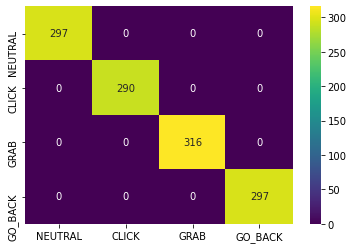

In [58]:
confusion_matrix = models['random_forest_classifier']['test_report']['conf_matrix']
print(models['random_forest_classifier']['test_report'])
labels = [type.name for type in ActionType]

table = pd.DataFrame(confusion_matrix, columns=labels[:4], index=labels[:4])
sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

# 8. Save model
---

## 8.1 Prepare file with model

In [59]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score # Accuracy metrics 

In [60]:
data = df.copy()

X = data.drop('target', axis=1) # features
y = data['target'] # target value

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [62]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [63]:
fit_models = {}
for algo, pipeline in pipelines.items():
    print(algo)
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

lr
rc
rf
gb


In [64]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 1.0
rc 1.0
rf 1.0
gb 0.9975


In [79]:
with open(MODEL_FILE_NAME, 'wb') as f:
    pickle.dump(fit_models['rf'], f)

## 8.2. Live presentation (with camera) 
---
You cat try classify hand gestures by your web camera. 

After successful classifing, predicted value will show in application window 

##### Imports

In [5]:
import pickle

Load classification model from file

In [6]:
with open(MODEL_FILE_NAME, 'rb') as f:
    model = pickle.load(f)
    
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [10]:
# cam_width, cam_height = 1280, 720
cap = CameraVideoCapture()
# cap.set(3, cam_width)
# cap.set(4, cam_height)

detector = hd.HandDetector(max_num_hands=2)

while cap.is_opened():
    
    print(cap.is_opened())
    
    success, img = cap.read()
    all_hands, img = detector.find_hands(img)

    
    if len(all_hands) == 2:
        print(all_hands)
    
    for hand in all_hands:
        if hand.type == HandType.RIGHT:
            landmarks = prepare_hand_data(hand)
            row = list(np.array(landmarks).flatten())

            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]


            # Display Class
            cv2.putText(img, 'CLASS:', (15,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 163, 51), 2, cv2.LINE_AA)
            cv2.putText(img, ActionType(body_language_class).name, (15,50), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, (240, 130, 0), 2, cv2.LINE_AA)

            # Display Probability
            cv2.putText(img, 'PROB:', (150,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 163, 51), 2, cv2.LINE_AA)
            cv2.putText(img, str(round(body_language_prob[np.argmax(body_language_prob)],2)), (150,50), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (240, 130, 0), 2, cv2.LINE_AA)


    cv2.imshow("Live Model Testing", img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
[Hand(landmarks=[[537, 496, 0.0], [578, 499, -0.02355296164751053], [609, 475, -0.04344061762094498], [605, 449, -0.06298890709877014], [587, 425, -0.08270132541656494], [612, 398, -0.04138103127479553], [626, 339, -0.06503168493509293], [630, 302, -0.07858909666538239], [630, 271, -0.0878259688615799], [574, 388, -0.045465219765901566], [591, 321, -0.0704469084739685], [599, 284, -0.0815645232796669], [601, 253, -0.08816012740135193], [537, 397, -0.051480021327733994], [544, 364, -0.07522367686033249], [558, 409, -0.07385256141424179], [565, 443, -0.06930927187204361], [504, 417, -0.060765575617551804], [515, 411, -0.07829293608665466], [532, 444, -0.07823552191257477], [544, 470, -0.07509566098451614]], border_box=(484, 233, 166, 286), center=(567, 376), type=<HandType.RIGHT: 'RIGHT'>), Hand(landmarks=[[548, 598, 0.0], [615, 564, -0.01634926348924637], [643, 509, -0.0219